# Group Project

As described in the project description, your 10 minute presentation should contain at least the following five sections:

1. Explanation of the problem
2. Brief description and exploratory data analysis of your dataset (including visualisations)
3. An explanation of your model
4. Results and evaluation of your classification performance
5. Conclusion

To create your presentation, you can use google slides, powerpoint, a pdf, or any other presentation format you wish. For the anlysis, you must use Python. In this Jupyter notebook, we will provide a bit of code guidance for how to complete the analysis for the five sections!

## 1. Explanation of the problem

The first part of your presentation should explain the problem. This should be fairly easy. The problem is already described in the group_project.pdf document. So you need to summarise that in your own words. If you'd like to add more information, then please be advised that the dataset you've been given is a subset of the dataset found here:

https://archive.ics.uci.edu/ml/datasets/Heart+Disease

You can find more information (and references) on that web page.

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


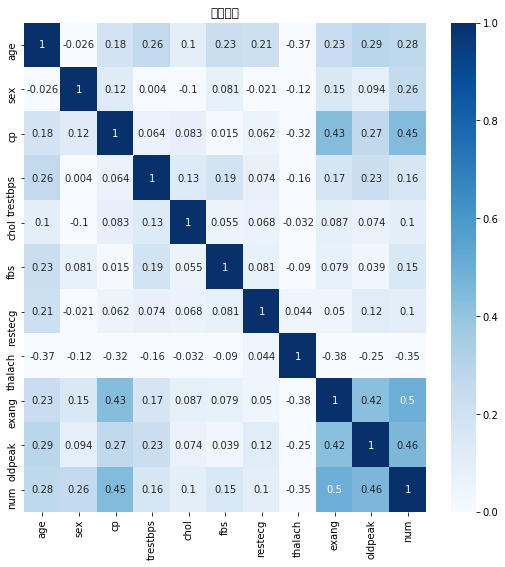

In [13]:
data = pd.read_csv('heart_disease_data.csv')
data.head()
#data = data.drop(['num'],axis=1)
corr = data.corr()
import seaborn as sns
fig, ax = plt.subplots(figsize=(9,9))
ax.set_title(u'相关系数')
sns.heatmap(corr,annot=True,vmax=1,vmin=0,xticklabels=True,yticklabels=True,cmap=plt.cm.Blues);


In [14]:
from sklearn.preprocessing import StandardScaler
Scaler = StandardScaler()
for column in data.columns:
    if column != 'status':
        data[column] = Scaler.fit_transform(data[column].values.reshape(-1,1))
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,num
0,0.970469,0.582153,0.843590,1.569086,0.116873,2.399799,0.403061,-1.331550,1.283054,1.898022,1.056873
1,-0.713779,0.582153,0.843590,0.427377,1.100878,-0.416702,-0.756515,-0.850468,1.283054,0.809279,1.056873
2,-1.450637,-1.717761,-0.219902,0.313207,-0.470077,-0.416702,-0.756515,0.432416,-0.779391,-0.823835,-0.946187
3,0.338876,0.582153,-2.346887,-0.714331,-0.936185,-0.416702,1.562637,0.833317,-0.779391,0.900008,-0.946187
4,-1.029575,-1.717761,-1.283394,-0.714331,-0.798079,-0.416702,-0.756515,0.953588,-0.779391,-0.823835,-0.946187


In [15]:
x = data[['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak']]
y = data['num']
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20)


In [16]:
from sklearn.linear_model import LogisticRegression

In [17]:
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)
 
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
 
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


In [18]:
from sklearn import preprocessing
lab_enc = preprocessing.LabelEncoder()
y_train_enc = lab_enc.fit_transform(y_train)

In [19]:
import itertools
lr = LogisticRegression(C=0.01,penalty = 'l2')
lr.fit(x_train,y_train_enc)
y_pred = lr.predict(x_test.values)

In [20]:
# Compute confusion matrix
from sklearn.metrics import confusion_matrix
y_test_enc = lab_enc.fit_transform(y_test)
cnf_matrix = confusion_matrix(y_test_enc,y_pred)
np.set_printoptions(precision=2)

In [21]:
print("Recall metric in the testing dataset: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))

Recall metric in the testing dataset:  0.7241379310344828


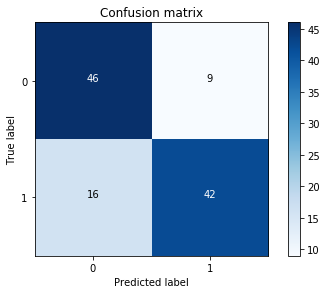

In [22]:
# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix')
plt.show()

## 2. Brief description and exploratory data analysis of your dataset (including visualisations)

This is the first section where you need to really start some Python coding! First things first, you need to load the dataset heart_disease_data.csv into Python. You have already learnt how to do that in week 2. Once you've loaded the datset, you'll have to use some of the methods you learnt in week 2 "loading, exploring and presenting data". You'll want to understand the distributions of the different features, such as age. You'll want to know how many of the individuals have heart disease and how many haven't. You may want to look at the relationships between features. You'll want to combine both some analysis and visualisation for this section.

And one more note! Remember what I said about categorical variables! Sometimes, categorical variables are stored as numbers, and they should be converted to categories or objects! See the week 2 notes!

In [23]:
from __future__ import absolute_import, division, print_function, unicode_literals

import numpy as np
import pandas as pd

import tensorflow as tf

from tensorflow import feature_column
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

In [24]:

dataframe = pd.read_csv('heart_disease_data.csv')
dataframe.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,num
0,62,1,4,160,254,1,1,108,1,3.0,1
1,46,1,4,140,311,0,0,120,1,1.8,1
2,39,0,3,138,220,0,0,152,0,0.0,0
3,56,1,1,120,193,0,2,162,0,1.9,0
4,43,0,2,120,201,0,0,165,0,0.0,0


In [25]:
train, test = train_test_split(dataframe, test_size=0.3)
train, val = train_test_split(train, test_size=0.3)
print(len(train), 'train examples')
print(len(val), 'validation examples')
print(len(test), 'test examples')

274 train examples
118 validation examples
169 test examples


In [26]:
def df_to_dataset(dataframe, shuffle=True, batch_size=32):
  dataframe = dataframe.copy()
  labels = dataframe.pop('num')
  ds = tf.data.Dataset.from_tensor_slices((dict(dataframe), labels))
  if shuffle:
    ds = ds.shuffle(buffer_size=len(dataframe))
  ds = ds.batch(batch_size)
  return ds

In [27]:
batch_size = 5 # 小批量用于演示目的
train_ds = df_to_dataset(train, batch_size=batch_size)
val_ds = df_to_dataset(val, shuffle=False, batch_size=batch_size)
test_ds = df_to_dataset(test, shuffle=False, batch_size=batch_size)

In [81]:
feature_columns = []

# numeric 数字列
for header in ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs','restecg','thalach', 'exang','oldpeak']:
  feature_columns.append(feature_column.numeric_column(header))

In [82]:
feature_layer = tf.keras.layers.DenseFeatures(feature_columns)



In [83]:
batch_size = 32
train_ds = df_to_dataset(train, batch_size=batch_size)
val_ds = df_to_dataset(val, shuffle=False, batch_size=batch_size)
test_ds = df_to_dataset(test, shuffle=False, batch_size=batch_size)

In [84]:
model = tf.keras.Sequential([
  feature_layer,
  layers.Dense(128, activation='relu'),
  layers.Dense(128, activation='relu'),
  layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(train_ds,
          validation_data=val_ds,
          epochs=5)

Epoch 1/5
9/9 [==============================] - 1s 65ms/step - loss: 5.7367 - acc: 0.5657 - val_loss: 3.9489 - val_acc: 0.5763
Epoch 2/5
9/9 [==============================] - 0s 2ms/step - loss: 3.3408 - acc: 0.4891 - val_loss: 3.2497 - val_acc: 0.5678
Epoch 3/5
9/9 [==============================] - 0s 2ms/step - loss: 2.2223 - acc: 0.5620 - val_loss: 1.0242 - val_acc: 0.6695
Epoch 4/5
9/9 [==============================] - 0s 2ms/step - loss: 1.4017 - acc: 0.5693 - val_loss: 0.9769 - val_acc: 0.6610
Epoch 5/5
9/9 [==============================] - 0s 2ms/step - loss: 1.2345 - acc: 0.5803 - val_loss: 0.7616 - val_acc: 0.6610


In [85]:
loss, accuracy = model.evaluate(test_ds)
print("Accuracy", accuracy)

6/6 [==============================] - 0s 34ms/step - loss: 0.9872 - acc: 0.6509
Accuracy 0.65088755


## 3. An explanation of your model

In week 3, you learn about classification models. There are many possible models you can choose from in Python, and you need to explain which one you decided to go with. You need to explain what parameters the model takes, how you fit those parameters to your data, and what the best fitting parameters were. So in this section, you will have to use sklearn to actually perform the machine learning and create the classification model! Also mention whether you trained on all the data, or a subset of data!

## 4. Results and evaluation of your classification performance

In the presentation, you need to explain how you evaluated your model. That means that in Python, you're going to have to perform that evluation and then show those results in your presentation. Some questions to consider include:

1. What evaluation metric(s) are you going to use?
2. What data are you evaluating your model performace on? All the data, or a subset?
3. Is your model generalisable?

## 5. Conclusion

And finally, based on your classification model and its evaluation, what conclusions can you make? Is the model useful? Can you predict heart disease? Is your model better at predicting that a person *does* have heart disease, or *does not* have heart disease? How could your model be improved?